In [1]:
NUM_CLUSTERS = 5
BATCH_SIZE = 5
NUM_STEPS = 50

LON_ANI_CENTER = [-87.73, -87.60]
LAT_ANI_CENTER = [41.85, 42.00]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib import animation
from matplotlib.patches import Ellipse
from IPython.display import HTML
plt.rcParams.update({'figure.max_open_warning': 0})

from scipy.stats import mode
import scipy.stats as sts

import numpy as np
import tensorflow as tf
from geopy.geocoders import Nominatim

import io
import base64
from dateutil import parser

In [8]:
# Импортирование данных

data = pd.read_csv('/home/ann/python/citibike/citibike-tripdata.csv', sep=',')

columns = data.columns
types = list(data.dtypes)

data16 = pd.read_csv('/home/ann/python/citibike/JC-20161-citibike-tripdata.csv', sep = ',', names=columns)
data17 = pd.read_csv('/home/ann/python/citibike/JC-201701-citibike-tripdata.csv', sep = ',', names=columns)
data18 = pd.read_csv('/home/ann/python/citibike/JC-201801-citibike-tripdata.csv', sep = ',', names=columns)

In [9]:
# Преобразование к одному типу и удаление первой строки

data16.drop(data16.index[0], inplace=True)
data16 = data16.astype(dict(zip(columns, types)), errors='raise')

data17.drop(data17.index[0], inplace=True)
data17 = data17.astype(dict(zip(columns, types)), errors='raise')

data18.drop(data18.index[0], inplace=True)
data18 = data18.astype(dict(zip(columns, types)), errors='raise')

In [10]:
# Объединение в единый датасет

dataset= pd.concat([data,  data16, data17, data18])
print(data.shape[0]+ data16.shape[0]+ data17.shape[0]+ data18.shape[0])
dataset.shape

56664


(56664, 15)

In [11]:
# соединим точки посаки и высадки (latitude - широта, longitude - долгота)

latitude = list(dataset['start station latitude'])+list(dataset['end station latitude'])
print('max latitude', str(max(latitude)))
print('min latitude', str(min(latitude)))

longitude = list(dataset['start station longitude'])+list(dataset['end station longitude'])
print('max longitude', str(max(longitude)))
print('min longitude', str(min(longitude)))


loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude


max latitude 40.8013434
min latitude 40.69263996618329
max longitude -73.97114574390001
min longitude -74.0969366


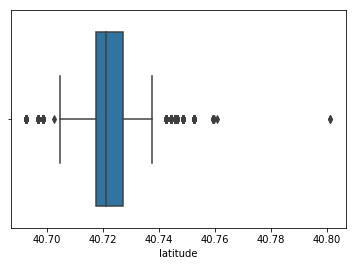

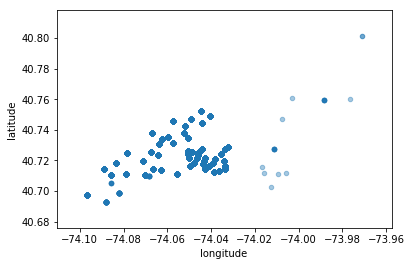

In [14]:
# Оценим выбросы
# sns.boxplot(loc_df.longitude)
sns.boxplot(loc_df.latitude)
loc_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'color'

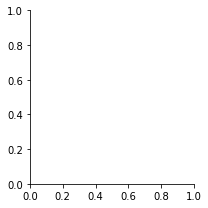

In [16]:
g = sns.FacetGrid(loc_df)
g.map(plt.boxplot);